In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize images to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define MLP model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with Gradient Descent optimizer and categorical cross-entropy loss
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 30 epochs
history = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))


170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/30
1563/1563 [==============================] - 26s 16ms/step - loss: 1.8713 - accuracy: 0.3246 - val_loss: 1.7299 - val_accuracy: 0.3614
Epoch 2/30
1563/1563 [==============================] - 25s 16ms/step - loss: 1.6658 - accuracy: 0.4069 - val_loss: 1.6092 - val_accuracy: 0.4276
Epoch 3/30
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5783 - accuracy: 0.4398 - val_loss: 1.5469 - val_accuracy: 0.4426
Epoch 4/30
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5144 - accuracy: 0.4594 - val_loss: 1.4730 - val_accuracy: 0.4772
Epoch 5/30
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4668 - accuracy: 0.4772 - val_loss: 1.5254 - val_accuracy: 0.4578
Epoch 6/30
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4194 - accuracy: 0.4959 - val_loss: 1.4287 - val_accuracy: 0.4971
Epoch 7/30
1563/1563 [==============================] - 2

Text(0.5, 1.0, 'Training and Validation Accuracy')

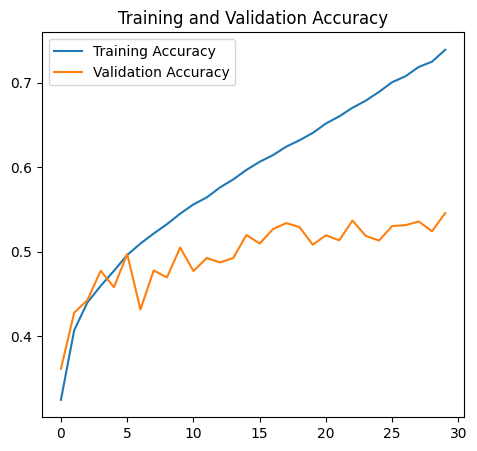

In [2]:

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')


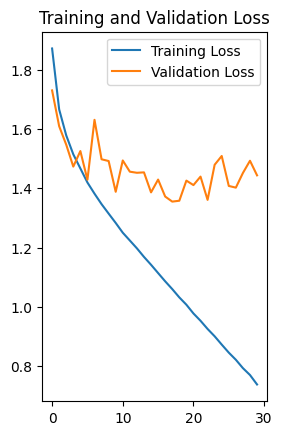

In [3]:

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [4]:

# Analyze observations:
# Here you'll observe how the accuracy and loss change over epochs. Based on these graphs, you can make observations on overfitting, underfitting, etc.

# For data augmentation:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(32, 32, 3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

# Create a new model with data augmentation
model_augmented = Sequential([data_augmentation] + model.layers)

# Compile the augmented model
model_augmented.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the augmented model
history_augmented = model_augmented.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))



Epoch 1/30
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4647 - accuracy: 0.4820 - val_loss: 1.3147 - val_accuracy: 0.5374
Epoch 2/30
1563/1563 [==============================] - 32s 20ms/step - loss: 1.4043 - accuracy: 0.4991 - val_loss: 1.3228 - val_accuracy: 0.5288
Epoch 3/30
1563/1563 [==============================] - 32s 21ms/step - loss: 1.3704 - accuracy: 0.5157 - val_loss: 1.2804 - val_accuracy: 0.5470
Epoch 4/30
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3525 - accuracy: 0.5197 - val_loss: 1.3267 - val_accuracy: 0.5329
Epoch 5/30
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3345 - accuracy: 0.5260 - val_loss: 1.2769 - val_accuracy: 0.5477
Epoch 6/30
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3220 - accuracy: 0.5313 - val_loss: 1.2701 - val_accuracy: 0.5517
Epoch 7/30
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3085 - accuracy: 0.5337 - val_loss: 1.2783 -

In [5]:

# For L2 regularization:
# Add L2 regularization to Dense layers
model_regularized = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1024, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(10, activation='softmax')
])

model_regularized.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_regularized = model_regularized.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))


Epoch 1/30
1563/1563 [==============================] - 30s 19ms/step - loss: 21.7712 - accuracy: 0.3079 - val_loss: 16.1989 - val_accuracy: 0.3311
Epoch 2/30
1563/1563 [==============================] - 29s 19ms/step - loss: 12.4887 - accuracy: 0.3685 - val_loss: 9.4935 - val_accuracy: 0.3862
Epoch 3/30
1563/1563 [==============================] - 29s 19ms/step - loss: 7.5709 - accuracy: 0.3850 - val_loss: 6.0072 - val_accuracy: 0.3792
Epoch 4/30
1563/1563 [==============================] - 29s 19ms/step - loss: 4.9404 - accuracy: 0.3921 - val_loss: 4.0769 - val_accuracy: 0.3906
Epoch 5/30
1563/1563 [==============================] - 29s 19ms/step - loss: 3.5282 - accuracy: 0.3961 - val_loss: 3.0439 - val_accuracy: 0.4070
Epoch 6/30
1563/1563 [==============================] - 30s 19ms/step - loss: 2.7665 - accuracy: 0.4012 - val_loss: 2.4786 - val_accuracy: 0.4229
Epoch 7/30
1563/1563 [==============================] - 29s 18ms/step - loss: 2.3532 - accuracy: 0.4049 - val_loss: 2.226